## Time-delay Embedding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp

from utils_task4 import *


# Part1

In [2]:
# Load the data from the file 'takens_1.txt' 
data = np.loadtxt('takens_1.txt')
data

array([[ 2.16837096, -0.54631259],
       [ 2.17981061, -0.53247518],
       [ 2.19002807, -0.51894034],
       ...,
       [ 2.14086777, -0.5761134 ],
       [ 2.15555144, -0.56069056],
       [ 2.16853679, -0.54611965]])

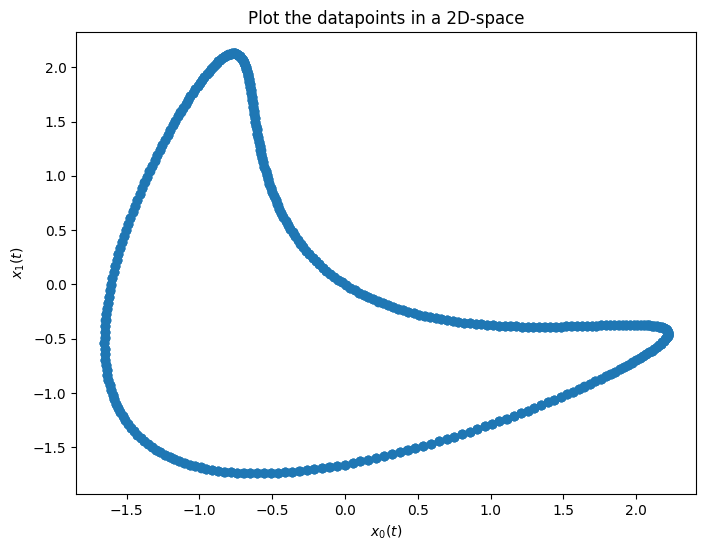

In [3]:
#Plot the datapoints in a 2D-space
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1])
plt.ylabel("$x_1(t)$")
plt.xlabel("$x_0(t)$")
plt.title("Plot the datapoints in a 2D-space")

# Save the figure as an image file
plt.savefig("figures/task4_takens_data")

# Display the plot
plt.show()

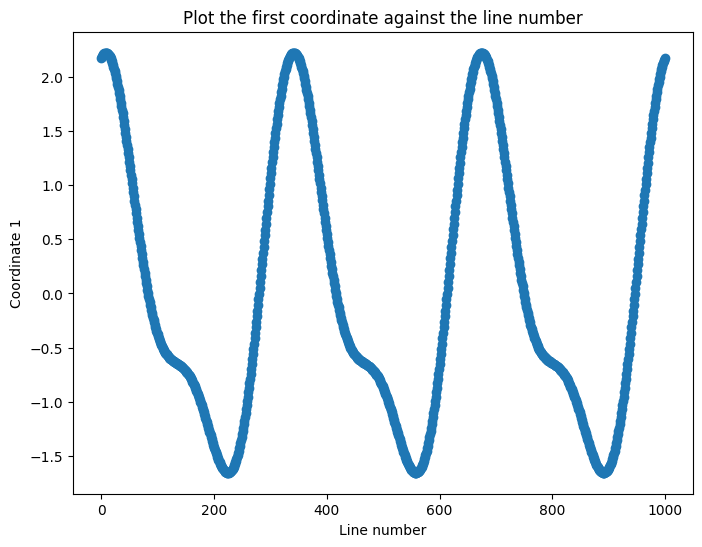

In [4]:
# Extract the first coordinate from the data
first_coord = data[:,0]
plt.figure(figsize=(8, 6))

# Create a scatter plot of the first coordinate against the line number
plt.scatter(range(len(first_coord)),first_coord)
plt.xlabel('Line number')
plt.ylabel('Coordinate 1')
plt.title("Plot the first coordinate against the line number")

plt.savefig("figures/task4_against_time")
plt.show()

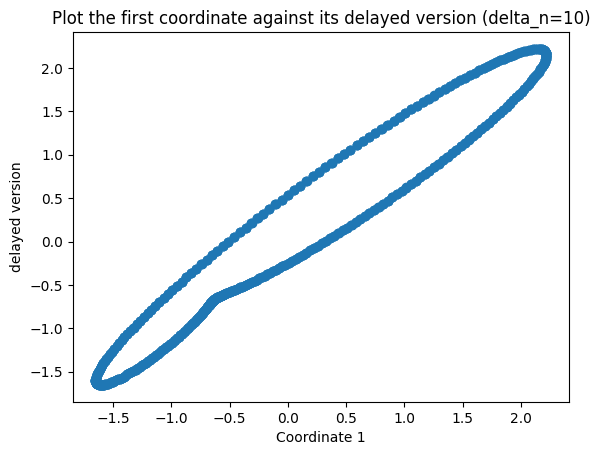

In [5]:
# Set the delay value
delay = 10

# Create delayed versions of the data
delayed_data = first_coord[:-delay]

# Create a scatter plot of the first coordinate against its delayed version
plt.scatter(delayed_data,first_coord[delay:])
plt.ylabel('delayed version')
plt.xlabel('Coordinate 1')
plt.title("Plot the first coordinate against its delayed version (delta_n=10)")

plt.savefig("figures/task4_against_delayed")
plt.show()

# Part2

In [6]:
# Generate the first set of data with initial conditions [10, 10, 10]
output1 = lorenz_attractor(xyz0 = [10,10,10], T_end = 1000, sigma=10, beta=8/3, rho=28)

# Generate the second set of data with slightly perturbed initial conditions [10+1e-8, 10, 10]
output2 = lorenz_attractor(xyz0 = [10+1e-8,10,10], T_end = 1000, sigma=10, beta=8/3, rho=28)

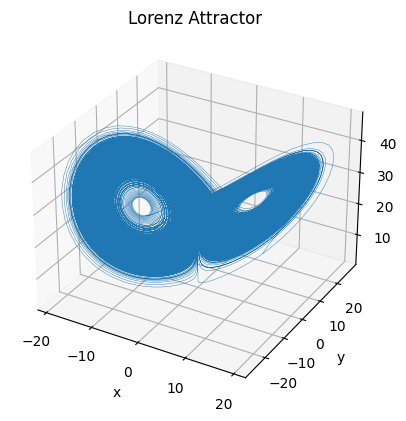

In [7]:
#plot the trajectory of the lorenz system with initial conditions [10, 10, 10]
plot_3d_traj(output1)

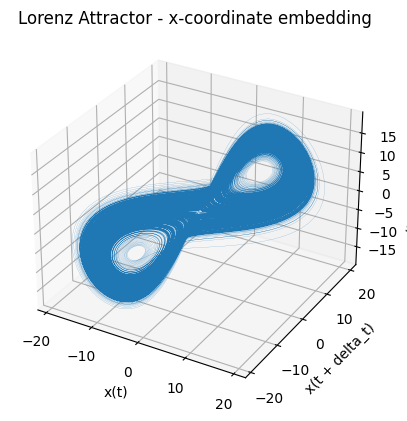

In [8]:
# Extract the values of the x-coordinate from output1
delta_t = 8
x = output1.y[0]

# Create the delayed versions of the x-coordinate
x_1=x[:-2*delta_t]
x_2=x[delta_t:-delta_t]
x_3=x[2*delta_t:]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_1, x_2, x_3, lw=0.1)

# Set the x, y, and z labels
ax.set_xlabel('x(t)')
ax.set_ylabel('x(t + delta_t)')
ax.set_zlabel('x(t + 2 * delta_t)')
ax.set_title('Lorenz Attractor - x-coordinate embedding')

plt.savefig("figures/task4_Lorenz_x")
plt.show()

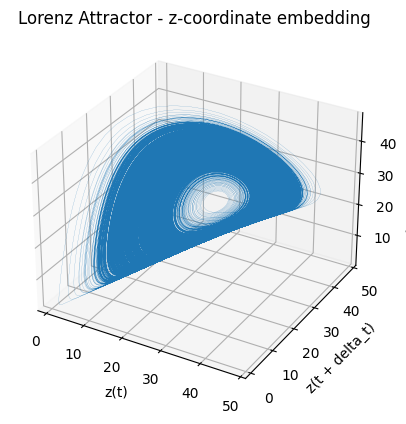

In [9]:
delta_t = 8
z = output1.y[2]

# Create the delayed versions of the z-coordinate
z_1=z[:-2*delta_t]
z_2=z[delta_t:-delta_t]
z_3=z[2*delta_t:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the embedded coordinates
ax.plot(z_1,z_2,z_3, lw=0.1)
ax.set_xlabel('z(t)')
ax.set_ylabel('z(t + delta_t)')
ax.set_zlabel('z(t + 2 * delta_t)')
ax.set_title('Lorenz Attractor - z-coordinate embedding')

# Save the figure as an image file
plt.savefig("figures/task4_Lorenz_z")
plt.show()

# Bonus


In [10]:
delta_t = 8
x = output1.y[0]

# Create delayed versions of the x-coordinate
x_1=x[:-2*delta_t]
x_2=x[delta_t:-delta_t]
x_3=x[2*delta_t:]

# Build the new state space and create a new trajectory in it
new_x = np.stack((x_1,x_2,x_3), axis=1)
x, fx = new_x[:-1], new_x[1:]

# approximate the vector field using the radial basis functions (RBF)
C, phi = nonlinear_approximation_function(x, fx, L=100, eps=10)

# Compute the approximate trajectory using the RBF approximation
approx_x = phi @ C

# Compute the Mean Squared Error (MSE)
MSE = mean_squared_error(fx, approx_x)
print("Mean Squared Error:", MSE)

approx_x

Mean Squared Error: 0.0016185389365782345


array([[ 8.48193832, 13.80635529, 14.55259028],
       [ 9.00439279, 14.59567313, 14.49123684],
       [ 9.58678477, 15.27530382, 14.17130194],
       ...,
       [ 2.41689644,  3.93463473,  6.16410203],
       [ 2.59218663,  4.15729185,  6.5384983 ],
       [ 2.76430375,  4.39152281,  6.93453791]])

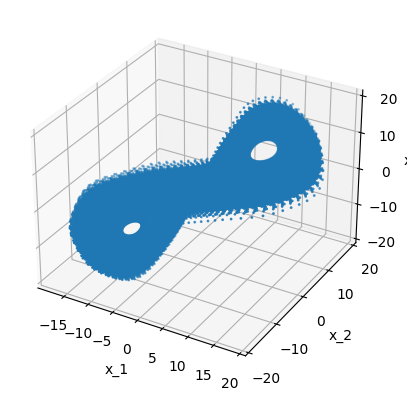

In [11]:
# plot the trajectory with the approx_x
plot_bonus_traj(approx_x)


In [12]:
# Solve the differential equation with approximation using solve_ivp

# Set up the parameters
nr_xl = 100
id_xl = np.random.permutation(x.shape[0])[:nr_xl]
eps=10

#Start and end time of the simulation
t_start = 0
t_end = 100
Num = 100000
# Time array
t = np.linspace(t_start, t_end, Num)

def eq(t, x):
    phi = get_phi(new_x, id_xl, x.reshape((1, 3)), eps)
    return phi @ C

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

# Solve the differential equation using a standard solver (solve_ivp)
for i in range(50):
    sol = solve_ivp(eq, [t_start, t_end], new_x[i, :], t_eval=t)
    #ax.plot(sol.y[0], sol.y[1],sol.y[2], linewidth=0.5)
    
# Plot the training data
#ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='red', s=1)